# The Absorption of Gamma Rays by Matter

### 7/19/18
#### Partners: Owen Book, Chris De Firmin

In this experiment we shall look into the physics behind radioactive decay and electronic instrumentation. As Dissector from the thrash metal band Ghoul has stated before, "We will die and become radioactive sludge soon," so let us delve into this natural phenomena and observe how ionizing radiation can be measured with a gieger counter and an oscilliscope. Within this experiment we will be facing purely random events since radioactive decay is a random occurrence within an isotope for a given amount of time. This means that thoughout this experiment we will be looking into the Poisson distribuiton where for a given $\Delta t$ the probability that $m$ particles be counted by our instruments is:
$$P(m) = e^{-\lambda} \frac{\lambda^m}{m!}$$
Where $\lambda$ is found to be:
$$\lim_{x \rightarrow \infty} \sum_{0}^{x}  m P(m) = \lambda$$

Later we shall utilize a similar distribution to analyze our chi-square value for the theoretical fits of our particle distribution function. The following code in the bottom shows a small sample size for the $\alpha$ calculations of a set of chi-square values. The $\alpha$ values shall be used to quantify the acceptablity of the null hypothesis, or the probability that the theoretical model agrees with our experimental observations given that we continue oberving endlessly.

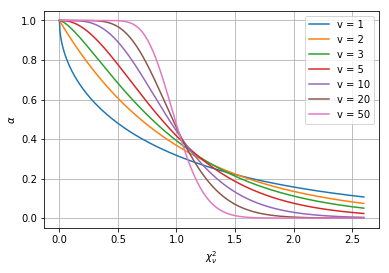

In [18]:
import scipy.integrate as integ
import scipy.special as specl
import numpy as np
import matplotlib.pyplot as plt

#The chi-square poisson distribution
def fchi2(x, v):
    a = (2**(v/2))*specl.gamma(v/2)
    b = np.exp(-x/2)*(x**((v/2) - 1))
    return b/a

def integrand(s,v):
    area_arr = np.empty(len(s))
    for i in range(len(s)):
        area_arr[i] = integ.quad(fchi2, s[i], 100, args=v)[0]
    return area_arr

check_v = np.array([1, 2, 3, 5, 10, 20, 50])
for v in check_v:
    tstchi2 = np.linspace(0,2.6*v, 600)
    out = integrand(tstchi2, v)
    plt.plot(tstchi2/v, out, label='v = %s'%v)

    
plt.xlabel(r'$\chi_{\nu}^2$')
plt.ylabel(r'$\alpha$')
plt.grid(True)
plt.legend()
plt.show()

In [3]:
cd C:\Users\Jesus\Documents\p133_lab\p_133_summer18_jjserrano\gamma_lab

C:\Users\Jesus\Documents\p133_lab\p_133_summer18_jjserrano\gamma_lab


In [3]:
np.loadtxt('counting_stats.txt',unpack=1)

array([  7.,   5.,   6.,   7.,  12.,   7.,  12.,   6.,   5.,   3.,   6.,
         6.,   3.,   9.,   6.,  12.,   5.,   7.,   5.,   6.,   6.,   7.,
         5.,   8.,   5.,   7.,   5.,   5.,   5.,   8.,   3.,  11.,  10.,
         7.,  12.,   6.,   8.,   3.,   6.,   5.,   4.,  11.,   7.,   8.,
         7.,   7.,  11.,   6.,  10.,   6.,  10.,   9.,   4.,   6.,  12.,
         6.,   8.,   8.,   9.,   4.,   7.,   7.,  10.,   4.,   6.,   5.,
        16.,   7.,  10.,   9.,   4.,   6.,  10.,   4.,   8.,   5.,   6.,
         5.,   7.,  10.,   7.,   3.,   9.,   8.,   6.,   7.,   5.,   4.,
         7.,   3.,  11.,   6.,   7.,   8.,  10.,  13.,  11.,   6.,   5.,
         7.])

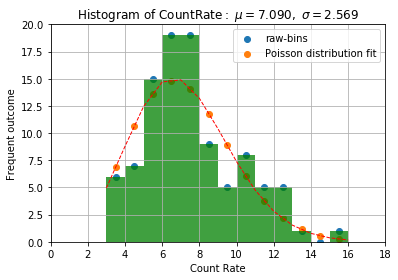

<IPython.core.display.Math object>

Probability of rejecting the null hypothesis:  0.7315322610352033
Chi-squared = 14.525, reduced chi-square = 1.210
With great certainty we may accept the null-hypothesis


In [117]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as ran
import scipy.stats as stat
from scipy.misc import factorial as fctr
import matplotlib.mlab as mlab
from IPython.display import display, Math


data = np.loadtxt('counting_stats.txt',unpack=1)
mu, sigma = np.mean(data), np.var(data)**(0.5)
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(data, int((max(set(data)) - min(set(data)))/1), facecolor='green', alpha=0.75)

s = np.array([])
for i in range(len(bins) - 1):
    midp = (bins[i] + bins[i+1])/2
    s = np.append(s,[midp])

# add a 'best fit' line
def poisson(m, mu):
    a = np.exp(-mu)
    b = (mu**m)/(fctr(m))
    return a*b

#y = mlab.normpdf( bins, mu, sigma)
y = 100*poisson(bins, mu)
l = plt.plot(bins, y, 'r--', linewidth=1)

y_mid = np.array([])
for i in range(len(y) - 1):
    midp = (y[i] + y[i+1])/2
    y_mid = np.append(y_mid,[midp])

plt.scatter(s, n, label='raw-bins')
plt.scatter(s, y_mid, label='Poisson distribution fit')
plt.xlabel('Count Rate')
plt.ylabel('Frequent outcome')
plt.title(r'$\mathrm{Histogram\ of\ Count Rate:}\ \mu=%.3f,\ \sigma=%.3f$'%(mu, sigma))
plt.axis([0, 18, 0, max(n)+1])
plt.grid(True)
plt.legend()

plt.show()



#Here are the values from the example in the text:
lamb=mu
npoints=len(data)

#Generate the data set we will call the real data.  It could
#just be done this way:
#data = ran.poisson(lamb,npoints)
#But I am going to cast it as a less-efficient loop instead to make
#it possible to go in and do something different with rate as a function of i:
rate = np.empty(npoints)

for i in range(0,npoints):
    rate[i] = lamb          #Or mess with it, but this will be the null hypothesis.

#Now calculate the individual likelihoods (whatever you have done to make rate
#different from lamb, we evaluate under the null hypothesis rate[i]=lamb:)
likelihoods = stat.poisson.pmf(data,lamb)

overall_l = np.prod(likelihoods)

#Now generate 1000 simulated data sets (we are pretending the one above is the
#real one), all from the null hypothesis.  Here we write it so that you can't
#tamper by using rates that are not the predicted lambda:

ntrials = 1000
simulated_l = np.empty(ntrials)
for j in range(0,ntrials):
    #the following would have been a second layer of loop using the approach
    #taken for the "real" data set:
    sim = ran.poisson(lamb,100)
    likelihoods_sim = stat.poisson.pmf(sim,lamb)
    simulated_l[j] = np.prod(likelihoods_sim)
    
#And now find out how often the simulated probability was <= the one from
#the data:


def bestfit_param(fitfunction, x, y, popt):
        yfit= 100*fitfunction(x,popt)
        chisq = sum( (y-yfit)**2 / yfit )
        dof = len(x) - 1
        return stat.chi2.cdf(chisq,dof), chisq, dof
        
sci_alpha, chisq1, dof1 = bestfit_param(poisson, s, n, mu)

def fchi2(x, v):
    a = (2**(v/2))*specl.gamma(v/2)
    b = np.exp(-x/2)*(x**((v/2) - 1))
    return b/a

def integrand(s,v):
    area_arr = integ.quad(fchi2, s, 100, args=v)[0]
    return area_arr

alpha2 = integrand(chisq1, dof1)




#under = (y_mid <= n).nonzero()
#fraction_onetail = (np.shape(under)[1])/ float(ntrials)
display(Math(r'\alpha = {}'.format(round(alpha2, 3))))
print('Probability of rejecting the null hypothesis: ',1.-alpha2)
print('Chi-squared = %.3f, reduced chi-square = %.3f'%(chisq1, (chisq1/dof1)))
if alpha2 > 0.15:
    print('With great certainty we may accept the null-hypothesis')

In [118]:
bins

array([  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,
        14.,  15.,  16.])

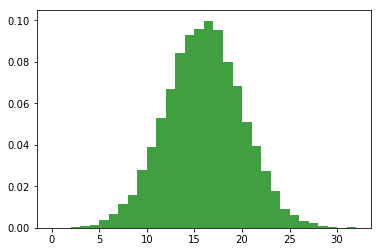

ValueError: 19.289999999999999 is not in list

In [8]:
#Simulate random distribution
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy.random as ran
import random as rd

mu = 16
sigma = mu**0.5
frst_val = mu + sigma*ran.randn(10000)
lost = frst_val.astype(int)
n, bins, patches = plt.hist(lost, (max(lost) - min(lost)), normed=1, facecolor='green', alpha=0.75)
plt.show()

s = np.array([])
for i in range(len(bins) - 1):
    midp = (bins[i] + bins[i+1])/2
    s = np.append(s,[midp])


s = 0
targ = 11
s_spot = np.empty(targ)
counts = np.empty(targ)
ct_o = bins[int(len(bins)/2)]

def Meta(x):
    while 1:
        fo = list(bins)
        .index(x)
        cnt_tst = rd.choice(bins)
        ff = list(bins).index(cnt_tst)
        w_cnt_tst = n[ff]
        w_x = n[fo]
        r = w_cnt_tst/w_x
        if r > rd.random():
            return cnt_tst

while s<targ:
    new_count = Meta(ct_o) + counts[s]
    counts = np.append(counts, [new_count])
    s += 1
    s_spot = np.append(s_spot,[s])
    ct_o = new_count
    
    

plt.plot(s_spot, counts)
plt.show()

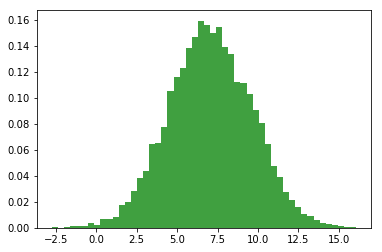

In [64]:
# import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)
plt.show()

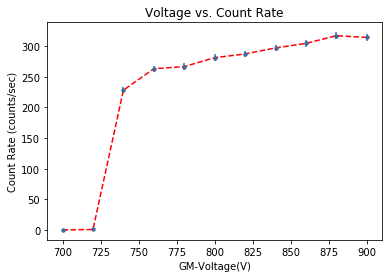

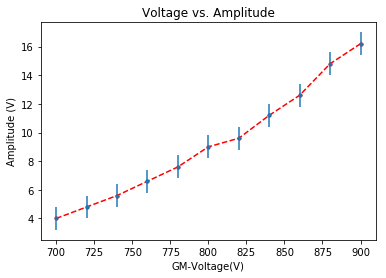

In [115]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x, y, t = np.loadtxt('null_count.txt',unpack=1)

T = 10
sigma_t = (t/T)**0.5
#plt.scatter(x,t)
plt.errorbar(x, t, yerr = sigma_t, fmt='.', label='Measured counts')
plt.plot(x, t, '.r--')
plt.xlabel('GM-Voltage(V)')
plt.ylabel('Count Rate (counts/sec)')
plt.title('Voltage vs. Count Rate')
plt.show()

sigma_y = 0.8

#plt.scatter(x,y)
plt.errorbar(x, y, yerr = sigma_y, fmt='.', label='Measureed Potential')
plt.plot(x, y, '.r--')
plt.xlabel('GM-Voltage(V)')
plt.ylabel('Amplitude (V)')
plt.title('Voltage vs. Amplitude')
plt.show()

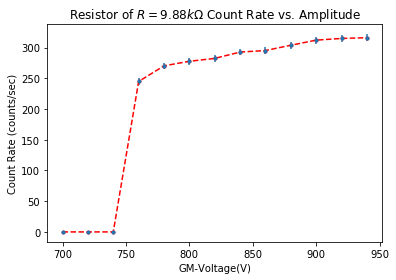

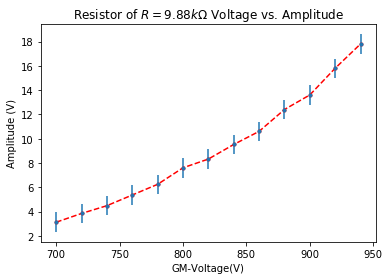

In [116]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x, y, t = np.loadtxt('resist_count.txt',unpack=1)


T = 10
sigma_t = (t/T)**0.5
#plt.scatter(x,t)
plt.errorbar(x, t, yerr = sigma_t, fmt='.', label='Simulaeted Data')
plt.plot(x, t, '.r--')
plt.xlabel('GM-Voltage(V)')
plt.ylabel('Count Rate (counts/sec)')
plt.title('Voltage vs. Count Rate')
plt.title(r'Resistor of $R = 9.88k\Omega$ Count Rate vs. Amplitude')
plt.show()

sigma_y = 0.8
#plt.scatter(x,y)
plt.errorbar(x, y, yerr = sigma_y, fmt='.', label='Simulaeted Data')
plt.plot(x, y, '.r--')
plt.xlabel('GM-Voltage(V)')
plt.ylabel('Amplitude (V)')
plt.title('Voltage vs. Amplitude')
plt.title(r'Resistor of $R = 9.88k\Omega$ Voltage vs. Amplitude')
plt.show()

In [114]:
thres, v1, to1 = np.loadtxt('capac_wave.txt', unpack=1)
c_k = 2.36e-9
thresh, v2, to2 = np.loadtxt('resist_wave.txt', unpack=1)
r_k = 9880

t1 = to1/np.log(2)
t2 = to2/np.log(2)

r_in = r_k*(t1 - t2)/(t2 + (c_k * r_k))
c_in = (t1/r_in) - c_k
q_in1 = v2*c_in
#q_in2 = v1*(c_in + c_k)
print('Internal resistance = %.3e (Ohms)'%r_in)
print('Internal capacitance = %.3e (F)'%c_in)
print('Internal charge = %.3e (C)'%q_in1)
#print('Internal charge recount = %.3e (C)'%q_in1)

Internal resistance = 7.852e+05 (Ohms)
Internal capacitance = 5.796e-10 (F)
Internal charge = 7.303e-09 (C)


Note that for the background radiation count rate $n$ data calculation below a weighted mean was calculated by using $\sigma_n^2 = \frac{n}{T}$, this means that $w_i = \frac{T}{n}$ making $\sigma_{\bar{n}} = \sqrt{\frac{1}{\sum \frac{T}{n_i}}} = \sqrt{\frac{1}{T\sum \frac{1}{n_i}}} = \sqrt{\frac{1}{T^2\sum \frac{1}{N_i}}}$ where $N$ is the number of counts obtained in a time interval $T$ if all of the count rates were measured at a constant time interval. Then:
$$\bar{n} = \sum \frac{n}{\sigma_n^2} \sigma_{\bar{n}}^2 = \sum \frac{n}{\frac{n}{T}} \sigma_{\bar{n}}^2 = T*\text{Number of data points}*\sigma_{\bar{n}}^2$$

In [64]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

dat = np.loadtxt('background_count.txt',unpack=1)
sig_j = (1/(90000*np.sum(1/dat)))**0.5
j = 300*len(dat)*(sig_j**2)
print('Average count rate for the background radiation is: %.2f +- %.2f'%(j, sig_j))

a_int, b_int, ab_int, tau_cal = np.loadtxt('two_source_calc.txt',unpack=1)
t = 300
a = (a_int/t) - j
sigma_a = np.sqrt((np.var(a_int/t)**2) + ((sig_j)**2))
b = (b_int/t) - j
sigma_b = np.sqrt((np.var(b_int/t)**2) + ((sig_j)**2))
ab = (ab_int/t) - j
sigma_ab = np.sqrt((np.var(ab_int/t)**2) + ((sig_j)**2))
main_fnt = ab*(a + b - ab)/(a * b)
normal_tau = 1 - ((1 - main_fnt)**0.5)
strict_tau = normal_tau/ab



div_a = (ab - b)/(2*(a**2)*b*((1 - main_fnt)**0.5))
div_b = (ab - a)/(2*(b**2)*a*((1 - main_fnt)**0.5))
div_ab = ((a + b -(2*ab))/(2*a*b*((1 - main_fnt)**0.5))) - strict_tau

sig_tau = (((div_a*sigma_a)**2) + ((div_b*sigma_b)**2) + ((div_ab*sigma_ab)**2))**0.5

sig_m_tau = (1/(np.sum(1/sig_tau**2)))**0.5
m_tau = np.sum(strict_tau/(sig_tau**2))*(sig_m_tau**2)

print('The weighted average dead-time calculated from three five minute trial sets is %.3e +- %.3e'%(m_tau, sig_m_tau))

print(strict_tau)

Average count rate for the background radiation is: 0.52 +- 0.01
The weighted average dead-time calculated from three five minute trial sets is 7.907e-04 +- 3.871e-04
[ 0.00081331  0.00076739  0.00079143]


In [ ]:
a, b, ab, tau_cal = np.loadtxt('two_source_calc.txt',unpack=1)
main_fnt = ab(a + b - ab)/(a * b)
normal_tau = 1 - ((1 - main_fnt)**0.5)
strict_tau = normal_tau/ab

C:\Users\Jesus\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


Part (a) complete
Part (b) is shall test the algorithm using the sample data below:
x data points: [ 2.974  2.473  1.971  1.505  1.     0.502  0.312]
y data points: [ 5.52906481  4.94640827  4.46973399  3.97489487  3.39869316  2.93727661
  2.55006619]
y-error data points: [ 0.06402219  0.05398921  0.0490629   0.04549737  0.03852987  0.04372802
  0.04088953]
results
slope = 1.089 +/- 0.021
intercept = 2.302 +/- 0.032
Chi-square, degrees of freedom, reduced chi-square:  10.7645143537 6 1.79408572562
Probability of exceeding this chi-square by chance for correct model:  0.0959328105702
With what confidence can we reject this model?  0.90406718943


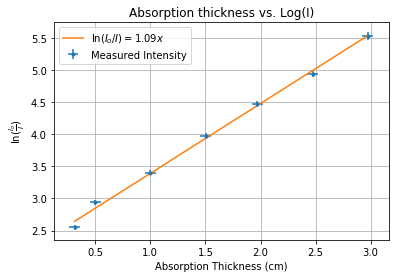

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy.random as ran
#Here are our first "scipy" packages (scientific Python):
import scipy.optimize as opt
import scipy.stats as stat
import scipy as scp

plates, mass, l, w, t = np.loadtxt('plates_mass.txt', unpack=1)
sigma_m = np.repeat(0.5, len(mass))
sigma_len = np.repeat(0.01, len(plates))
vol = l*w*t
dens = mass/vol
#sigma_dens = (((sigma_m/vol)**2) + (((mass/vol*sigma_len)**2)*(((1/l)**2) + ((1/w)**2) + ((1/h)**2))))**0.5
#thicc = mass/(l*w*np.mean(dens))
#sigma_thicc = np.var(thicc)**0.5



column_dens_ref = dens*t 

calc_thic, counts, time = np.loadtxt('absorption_data.txt', unpack=1)
#recorded two background rates
background_rate = 397/921
sigm_br = (397/(921**2))**0.5

#tim = 600
#colum_dens = np.empty(len(plate_set))
#for i in range(len(plate_set)):
#    colum_dens[i] = np.sum(colum_dens_ref[plate_set[i]])
    
ms_rate = counts/time
sigm_ms_rate = (ms_rate/time)**0.5
act_cnt = ms_rate - background_rate
sigm_act_cnt = np.sqrt((sigm_br**2) + (sigm_ms_rate**2))

n_o = act_cnt[len(act_cnt) - 1]
sigm_n_o = sigm_act_cnt[len(act_cnt) - 1]
log_counts = np.log(n_o/act_cnt[:(len(act_cnt) - 1)])
#log_counts = np.log(act_cnt[1:]/act_cnt[:(len(act_cnt) - 1)])
#x= column_dens[0:6]
#x= column_dens
x = calc_thic[:(len(act_cnt) - 1)]*(1/10)
#y = log_counts[0:6]
y = log_counts
#Define the uncertainty in count rate
dy = (((sigm_n_o/n_o)**2) +((sigm_act_cnt[:(len(act_cnt) - 1)]/act_cnt[:(len(act_cnt) - 1)])**2))**0.5
#dy = (((sigm_act_cnt[1:]/act_cnt[1:])**2) +((sigm_act_cnt[:(len(act_cnt) - 1)]/act_cnt[:(len(act_cnt) - 1)])**2))**0.5

'''guessparams = np.array([1,1])

def fitfunction(x,*p):
    return p[0]*x + p[1]

xsmooth1 = np.linspace(np.min(x),np.max(x),1000)

popt, pcov = opt.curve_fit(fitfunction, x, y, sigma=dy, p0=guessparams,absolute_sigma=1)
for i in range(0,len(popt)):
    print('param ',i,' = ',popt[i], '+/-', np.sqrt(pcov[i,i]))'''

#Expectation value of the nth-power of the x-array weighted by the inverse of the y-variance
def u(x, sig, n):
    tp = x**n
    bt = sig**2
    ary = tp/bt
    return np.sum(ary)

#Expectation value of the inner product between the the nth-power of the x-array and the y-array weighted by the inverse of the y-variance
def w(x, y, sig, n):
    tp = y*(x**n)
    bt = sig**2
    ary = tp/bt
    return np.sum(ary)
    
#Linear-fit algorithm using least-squares method
def linfit(x_data, y_data, y_error):
    u_0 = u(x_data, y_error, 0)
    u_1 = u(x_data, y_error, 1)
    u_2 = u(x_data, y_error, 2)
    
    w_0 = w(x_data, y_data, y_error, 0)
    w_1 = w(x_data, y_data, y_error, 1)
    w_2 = w(x_data, y_data, y_error, 2)
    
    D = (u_0 * u_2) - (u_1 ** 2)
    stnd_1 = (u_0 * w_1) - (w_0 * u_1)
    stnd_2 = (u_2 * w_0) - (w_1 * u_1)
    
    slope = stnd_1/D
    var_sl = u_0/D
    
    y_intr = stnd_2/D
    var_yt = u_2/D
    
    return np.array([slope, y_intr, var_sl, var_yt])
    
print("Part (a) complete")
    
    
print("Part (b) is shall test the algorithm using the sample data below:")



print('x data points: %s'%x)
print('y data points: %s'%y)
print('y-error data points: %s'%dy)

rs = linfit(x, y, dy)
print("results")
print("slope = %.3f +/- %.3f"%(rs[0], rs[2]**0.5))
print("intercept = %.3f +/- %.3f"%(rs[1], rs[3]**0.5))


smpl_x = np.linspace(min(x), max(x), 20)

fsmooth2 =  rs[1] + (rs[0] * smpl_x)

yfit=  rs[1] + (rs[0] * x)
chisq = sum( (y-yfit)**2 / dy**2 )
dof = len(x) - 1
chisq_reduced = chisq/float(dof)
print('Chi-square, degrees of freedom, reduced chi-square: ',chisq,dof,chisq_reduced)
print('Probability of exceeding this chi-square by chance for correct model: ',1.-stat.chi2.cdf(chisq,dof))
print('With what confidence can we reject this model? ',stat.chi2.cdf(chisq,dof))

#fig, ax = plt.subplots()
plt.errorbar(x, y, xerr = 0.05, yerr = dy, ls = None, fmt = '.', label='Measured Intensity')
plt.plot(smpl_x,fsmooth2, label = r'$\ln(I_o/I) = %.2f x$'%rs[0])
#plt.axis([0, 40, -3, 3])
#ax.error(column_dens[0:6], log_counts[0:6], xerr = 0.5, yerr = dy)
#plt.plot(column_dens, log_counts)
plt.xlabel('Absorption Thickness (cm)')
plt.ylabel(r'$\ln(\frac{I_o}{I})$')
plt.title('Absorption thickness vs. Log(I)')
plt.legend()
plt.grid(True)
plt.show()

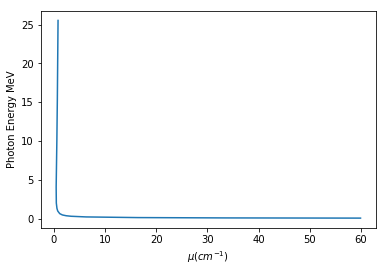

[ 1.08927301  2.42        1.68        1.16        0.771       0.62      ]
[ 0.662   0.4086  0.5108  0.6811  1.022   1.362 ]


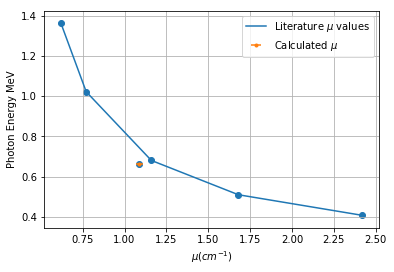

In [5]:
import matplotlib.pyplot as plt

photo, coeff = np.loadtxt('photon_mu.txt', unpack=1)
plt.plot(coeff, photo)
plt.xlabel(r'$\mu (cm^{-1})$')
plt.ylabel('Photon Energy MeV')
plt.show()

local_coeff = np.array([rs[0]])
local_phot = np.array([0.662])
for s in range(len(coeff)):
    mark = photo[s]
    if mark<1.4 and mark>0.4:
        local_phot = np.append(local_phot,[mark])
        local_coeff = np.append(local_coeff, [coeff[s]])
        
print(local_coeff)
print(local_phot)

plt.scatter(local_coeff, local_phot)
plt.plot(local_coeff[1:], local_phot[1:], label=r'Literature $\mu$ values')
plt.errorbar(rs[0], 0.662, xerr = rs[2]**0.5, ls = None, fmt = '.', label = r'Calculated $\mu$')
plt.xlabel(r'$\mu (cm^{-1})$')
plt.ylabel('Photon Energy MeV')
plt.legend()
plt.grid(True)
plt.show()

103.02

In [96]:
sigma

2.5175786257921295

In [102]:
sample = np.array([1.86, 2.08, 1.40, 1.18, 0.84, 0.60, 0.42, 0.21, -0.1, -0.46, -0.58, -0.8, -1, -1.34, -1.77, -1.83])
error = np.var(sample)**(1/2)
new_error = sample - error

In [103]:
new_error

array([ 0.66447727,  0.88447727,  0.20447727, -0.01552273, -0.35552273,
       -0.59552273, -0.77552273, -0.98552273, -1.29552273, -1.65552273,
       -1.77552273, -1.99552273, -2.19552273, -2.53552273, -2.96552273,
       -3.02552273])